In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [10]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [12]:
df. is_health_worker.isnull().sum()

804

(array([23004.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2899.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

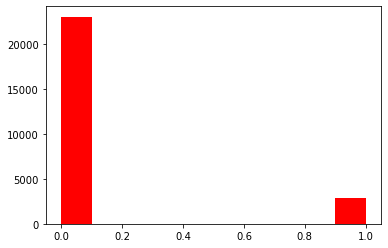

In [13]:
plt.hist(df.is_health_worker,color='red')

C:\Users\SURESH A\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='is_health_worker', ylabel='Density'>

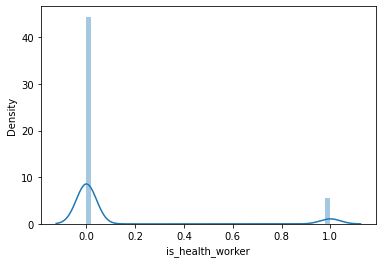

In [14]:
sns.distplot(df['is_health_worker'])

In [15]:
df.is_health_worker.mean() 

0.111917538509053

In [16]:
df['is_health_worker']=df['is_health_worker'].fillna(df["is_health_worker"].median())

In [17]:
df. is_health_worker.isnull().sum()

0

In [18]:
df. is_health_worker.value_counts()

0.0    23808
1.0     2899
Name: is_health_worker, dtype: int64

In [19]:
df.is_h1n1_risky.isnull().sum() 

388

In [20]:
df['is_h1n1_risky']=df['is_h1n1_risky'].fillna(df["is_h1n1_risky"].median())

In [21]:
df.is_h1n1_risky.isnull().sum() 

0

In [22]:
df.is_h1n1_risky.median()

2.0

In [23]:
df.is_h1n1_risky.value_counts()

2.0    10307
1.0     8139
4.0     5394
5.0     1750
3.0     1117
Name: is_h1n1_risky, dtype: int64

In [24]:
df.dr_recc_h1n1_vacc.isnull().sum()

2160

In [25]:
df.dr_recc_h1n1_vacc.value_counts()

0.0    19139
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

In [26]:
df.dr_recc_h1n1_vacc.median()

0.0

In [27]:
df.dr_recc_h1n1_vacc.mode()

0    0.0
dtype: float64

In [28]:
df['dr_recc_h1n1_vacc']=df['dr_recc_h1n1_vacc'].fillna(df["dr_recc_h1n1_vacc"].median())

In [29]:
df.dr_recc_h1n1_vacc.isnull().sum()

0

In [30]:
df.dr_recc_h1n1_vacc.value_counts()

0.0    21299
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

In [31]:
data=df[['race','sex','is_h1n1_risky','is_health_worker','dr_recc_h1n1_vacc','h1n1_vaccine']]

In [32]:
data.head()

,race,sex,is_h1n1_risky,is_health_worker,dr_recc_h1n1_vacc,h1n1_vaccine
0,White,Female,1.0,0.0,0.0,0
1,White,Male,4.0,0.0,0.0,0
2,White,Male,1.0,0.0,0.0,0
3,White,Female,3.0,0.0,0.0,0
4,White,Female,3.0,0.0,0.0,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   race               26707 non-null  object 
 1   sex                26707 non-null  object 
 2   is_h1n1_risky      26707 non-null  float64
 3   is_health_worker   26707 non-null  float64
 4   dr_recc_h1n1_vacc  26707 non-null  float64
 5   h1n1_vaccine       26707 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ MB


In [34]:
data.shape

(26707, 6)

In [35]:
data.describe()

,is_h1n1_risky,is_health_worker,dr_recc_h1n1_vacc,h1n1_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000
mean,2.337589,0.108548,0.202494,0.212454
std,1.276825,0.311077,0.401866,0.409052
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,1.000000,1.000000


In [36]:
data.isnull().sum()

race                 0
sex                  0
is_h1n1_risky        0
is_health_worker     0
dr_recc_h1n1_vacc    0
h1n1_vaccine         0
dtype: int64

In [37]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
mylogit = smf.glm(formula='h1n1_vaccine~race+sex+is_h1n1_risky+dr_recc_h1n1_vacc+is_health_worker', data=data, family=sm.families.Binomial())
res = mylogit.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           h1n1_vaccine   No. Observations:                26707
Model:                            GLM   Df Residuals:                    26699
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11032.
Date:                Thu, 05 Aug 2021   Deviance:                       22064.
Time:                        10:28:08   Pearson chi2:                 2.65e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [38]:
x=data.drop(['h1n1_vaccine'],axis=1)

In [39]:
x

,race,sex,is_h1n1_risky,is_health_worker,dr_recc_h1n1_vacc
0,White,Female,1.0,0.0,0.0
1,White,Male,4.0,0.0,0.0
2,White,Male,1.0,0.0,0.0
3,White,Female,3.0,0.0,0.0
4,White,Female,3.0,0.0,0.0
...,...,...,...,...,...
26702,White,Female,1.0,0.0,0.0
26703,White,Male,2.0,1.0,1.0
26704,White,Female,4.0,0.0,0.0
26705,Hispanic,Female,1.0,0.0,0.0


In [40]:
y=data[['h1n1_vaccine']]

In [41]:
ypredict = res.predict(x)
ypredict

0        0.062741
1        0.254504
2        0.073471
3        0.150493
4        0.150493
           ...   
26702    0.062741
26703    0.645446
26704    0.223718
26705    0.044547
26706    0.073471
Length: 26707, dtype: float64

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
ypredict_binomial = [0 if x < 0.5 else 1 for x in ypredict]
# Classification report
print(classification_report(y,ypredict_binomial))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89     21033
           1       0.65      0.36      0.46      5674

    accuracy                           0.82     26707
   macro avg       0.75      0.65      0.68     26707
weighted avg       0.80      0.82      0.80     26707



0.7948094171837092


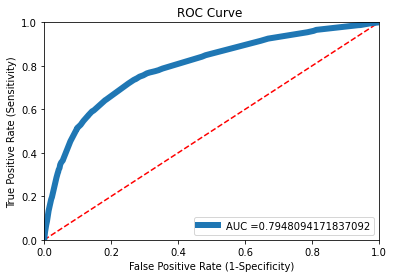

In [43]:
#ROC Curve - Receiver Operating Characteristic curve
#tpr = True Positive Rate 
#fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds =roc_curve(y, ypredict)
roc_auc = auc(fpr, tpr) 
print(roc_auc) # AUC - 0.77

#ROC Curve
plt.title('ROC Curve ')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' + str(roc_auc), lw=6)
plt.legend(loc=4) #Location of label
plt.show()

In [44]:
numeric=data.select_dtypes(include=np.number)

In [45]:
categoric=data.select_dtypes(include="object")

In [46]:
DF=pd.get_dummies(categoric,drop_first=True)

In [47]:
dummy_df=pd.concat([numeric,DF],axis=1)

In [48]:
dummy_df.head()

,is_h1n1_risky,is_health_worker,dr_recc_h1n1_vacc,h1n1_vaccine,race_Hispanic,race_Other or Multiple,race_White,sex_Male
0,1.0,0.0,0.0,0,0,0,1,0
1,4.0,0.0,0.0,0,0,0,1,1
2,1.0,0.0,0.0,0,0,0,1,1
3,3.0,0.0,0.0,0,0,0,1,0
4,3.0,0.0,0.0,0,0,0,1,0


In [49]:
X=dummy_df.drop(["h1n1_vaccine"],axis=1)
Y=dummy_df[["h1n1_vaccine"]]

In [50]:
X.head()

,is_h1n1_risky,is_health_worker,dr_recc_h1n1_vacc,race_Hispanic,race_Other or Multiple,race_White,sex_Male
0,1.0,0.0,0.0,0,0,1,0
1,4.0,0.0,0.0,0,0,1,1
2,1.0,0.0,0.0,0,0,1,1
3,3.0,0.0,0.0,0,0,1,0
4,3.0,0.0,0.0,0,0,1,0


In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model= LogisticRegression(solver='liblinear')
model.fit(X,Y)


C:\Users\SURESH A\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(solver='liblinear')

In [53]:
print('Coefficient of model :', model.coef_)
print('Intercept of model',model.intercept_)

Coefficient of model : [[0.48472133 0.8657272  1.77316564 0.23434793 0.48224428 0.59567274
  0.16648354]]
Intercept of model [-3.77816987]


In [54]:
ypred1 = model.predict(X)
ypred1
print(classification_report(Y,ypred1))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     21033
           1       0.65      0.35      0.46      5674

    accuracy                           0.82     26707
   macro avg       0.75      0.65      0.68     26707
weighted avg       0.80      0.82      0.80     26707



In [55]:
y_pred_prob1 = model.predict_proba(X)
y_pred_prob1[:,1]

array([0.06310473, 0.25404985, 0.07369338, ..., 0.22380793, 0.0448262 ,
       0.07369338])

In [56]:
fpr, tpr, thresholds =roc_curve(y, y_pred_prob1[:,1])
roc_auc = auc(fpr, tpr) 
print(roc_auc)

0.7948454650740102


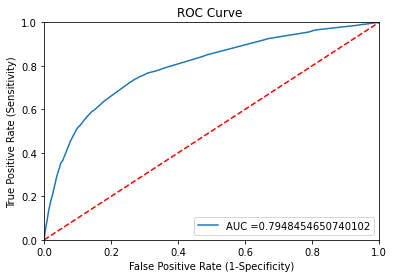

In [57]:
plt.title('ROC Curve ')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()